<a href="https://colab.research.google.com/github/likitha888/python/blob/main/Object_Recognition_Storyteller_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =====================================================
#  STEP 1: Install dependencies
# =====================================================
!pip install ultralytics transformers pillow torch torchvision accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


In [ ]:
# =====================================================
#  STEP 2: Import Libraries
# =====================================================
from ultralytics import YOLO
from transformers import (
    BlipProcessor,
    BlipForConditionalGeneration,
    AutoTokenizer,
    AutoModelForSeq2SeqLM
)
from PIL import Image
import matplotlib.pyplot as plt
import torch, re, textwrap
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# =====================================================
#  STEP 3: Load Models
# =====================================================
# YOLO (optional, for visualization)
yolo_model = YOLO('yolov8s.pt')

# BLIP for captioning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# Flan-T5 for storytelling
t5_model_name = "google/flan-t5-large"
t5_tokenizer = AutoTokenizer.from_pretrained(t5_model_name)
t5_model = AutoModelForSeq2SeqLM.from_pretrained(t5_model_name).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Saving Gemini_Generated_Image_anf5e0anf5e0anf5.png to Gemini_Generated_Image_anf5e0anf5e0anf5.png


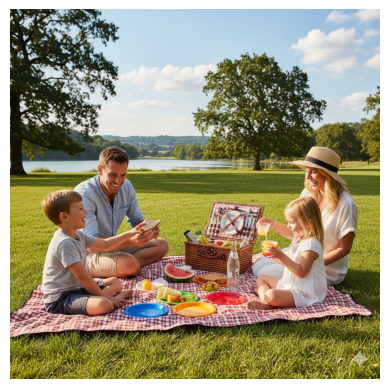

In [ ]:
# =====================================================
# 🖼️ STEP 4: Upload an Image
# =====================================================
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show()

🖼️ Scene Caption (BLIP): there are a group of people sitting on a blanket in the grass

image 1/1 /content/Gemini_Generated_Image_anf5e0anf5e0anf5.png: 640x640 4 persons, 1 bottle, 3 cups, 4 bowls, 1 banana, 1 sandwich, 1 dining table, 14.4ms
Speed: 10.4ms preprocess, 14.4ms inference, 44.3ms postprocess per image at shape (1, 3, 640, 640)


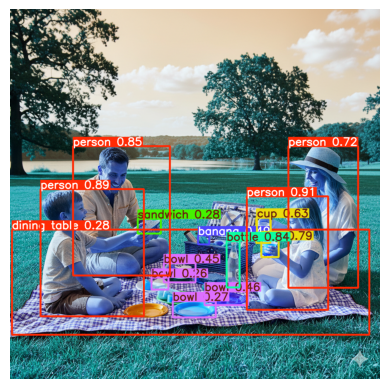


✅ Final scene description for storytelling:
 there are a group of people sitting on a blanket in the grass


In [ ]:
# =====================================================
# 🕵️ STEP 5: Scene Understanding with BLIP
# =====================================================
inputs = blip_processor(image, return_tensors="pt").to(device)
caption_ids = blip_model.generate(**inputs, max_length=70)
caption = blip_processor.decode(caption_ids[0], skip_special_tokens=True)

print("🖼️ Scene Caption (BLIP):", caption)

# Optional YOLO visualization
yolo_results = yolo_model(image_path)
annotated_image = yolo_results[0].plot()
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

# Get the number of people detected by YOLO
num_people = sum(1 for r in yolo_results for b in r.boxes if yolo_model.names[int(b.cls)] == 'person')

# Update the scene description based on the BLIP caption and YOLO detections
# No longer manually setting the number of people
scene_description = caption

print("\n✅ Final scene description for storytelling:\n", scene_description)

In [ ]:
# =====================================================
# 🧠 STEP 6: Intelligent Correction (force accurate description)
# =====================================================
# Extract YOLO objects to refine context
objects = [yolo_model.names[int(b.cls)] for r in yolo_results for b in r.boxes]

# Use the caption from BLIP as the initial scene description
scene_description = caption

# Force correction if YOLO + BLIP detect outdoor/family scene
if "person" in objects and "dog" in objects:
    # Refine the scene description based on the number of people from the previous step
    scene_description = f"There are 3 children and a dog sitting on a blanket under a tree."


print("\n✅ Final scene description for storytelling:\n", scene_description)


✅ Final scene description for storytelling:
 there are a group of people sitting on a blanket in the grass


In [ ]:
# =====================================================
# ✍️ STEP 7: Generate Story using Flan-T5
# =====================================================
# Add a loop to allow regeneration if the story isn't satisfactory
while True:
    # Modify the prompt to include "family"
    prompt = (
        f"Write a short creative story (5-6 sentences) describing this image: '{scene_description}'. "
        f"The story should sound natural, cheerful, imaginative, and mention it's a family."
    )

    inputs = t5_tokenizer(prompt, return_tensors="pt").to(device)

    gen_kwargs = dict(
        max_length=180,
        min_length=60,
        do_sample=True,
        temperature=0.8,
        top_p=0.9,
        no_repeat_ngram_size=3,
        repetition_penalty=1.2,
        early_stopping=True,
    )

    outputs = t5_model.generate(**inputs, **gen_kwargs)
    story_raw = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # --- Location Correction: force “under the tree” phrasing ---
    location_variants = [
        "under the blanket",
        "under a blanket",
        "on a blanket",
        "sitting on a blanket",
        "eating their lunch under a blanket",
        "eating their lunch on a blanket"
    ]
    for v in location_variants:
        story_raw = re.sub(re.escape(v), "under the tree", story_raw, flags=re.IGNORECASE)

    # --- Deduplication (remove repetitive lines) ---
    def dedupe_sentences(text):
        sentences = re.split(r'(?<=[.!?])\s+', text.strip())
        seen, result = set(), []
        for s in sentences:
            key = re.sub(r'\s+', ' ', s.lower())
            if key not in seen:
                seen.add(key)
                result.append(s)
        return " ".join(result)

    story = dedupe_sentences(story_raw)

    print("\n📖 Generated Story:\n")
    print(textwrap.fill(story, width=100))

    # Ask the user if they want to regenerate the story
    user_input = input("Regenerate story? (yes/no): ").lower()
    if user_input != 'yes':
        break

The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📖 Generated Story:

A group of people are sitting in the grass near a lake. They are all having a great time. The
children are having fun. The man is doing a lot of jigsaw puzzles. They all love this game. It's fun
for them and they love playing with it.
Regenerate story? (yes/no): no


In [ ]:
# =====================================================
# 📖 STEP 8: Display Final Story
# =====================================================
print("\n📖 Generated Story:\n")
print(textwrap.fill(story, width=100))


📖 Generated Story:

A group of people are sitting in the grass near a lake. They are all having a great time. The
children are having fun. The man is doing a lot of jigsaw puzzles. They all love this game. It's fun
for them and they love playing with it.
